# Lab2

---

## Task

Реализовать метод решения СЛАУ, на выбор: LU-разложение или метод квадратного корня. Для матриц A, L, U вычислить числа обусловленности (см. задание 1).

Протестировать на разных матрицах: хорошо обусловленных, (очень) плохо обусловленных.

Для нескольких плохо обусловленных матриц (например, для матриц Гильберта разного, больше 15, порядка) реализовать метод регуляризации:
- параметр α варьировать в пределах от 10<sup>-12</sup> до 10<sup>-1</sup>
- для каждого конкретного значения α найти числа обусловленности (матриц A + αE) и норму погрешности получившегося решения
- понять, какое значениe α = α в каждом конкретном случае (= для каждой конкретной матрицы) кажется наилучшим

Наилучшее α можно
- находить из предположений, что точным решением является вектор x_0 = (1, 1, ... , 1)<sup>T</sup>
- находить из предположений, что точным решением является случайный вектор x_0
Проверить результат на (другом) случайном векторе x_0.

## Solution

--- 

LU decomposition is used.

In [89]:
from scipy import linalg as la

def lu_solve(A, b):
    lu, pivot = la.lu_factor(A)
    sol = la.lu_solve((lu, pivot), b)
    return sol

## Experimental research

---

In [90]:
from utils.cond_nums import *
from utils.matrices import *

In [91]:
def print_cond_nums_for_A_L_U(A):
    _, L, U = la.lu(A)
    for name, matr in (("A", A), ("L", L), ("U", U)):
        spec_cn, bulk_cn, ang_cn = compute_matr_condition_nums(matr)
        print(f"Matrix {name}:")
        print(f"    Spectral condition number : {spec_cn}")
        print(f"    Bulk condition number     : {bulk_cn}")
        print(f"    Angular condition number  : {ang_cn}")

### Tests on different matrices:
- randomly generated matrix
- randomly generated sparse matrix
- tridiagonal diagonally dominant matrix
- hilbert matrices

In [92]:
rank = 50

In [93]:
A = create_random_matrix(rank)
print_cond_nums_for_A_L_U(A)

Matrix A:
    Spectral condition number : 1731.8025375014724
    Bulk condition number     : 7.094627594335242e+25
    Angular condition number  : 86.42380034807194
Matrix L:
    Spectral condition number : 332.02097072391285
    Bulk condition number     : 1.445598510526072e+17
    Angular condition number  : 9.425380564259177
Matrix U:
    Spectral condition number : 647.1944384661543
    Bulk condition number     : 1.4577904792290827e+21
    Angular condition number  : 14.717813092661554


In [94]:
A = create_random_sparse_matrix(rank)
print_cond_nums_for_A_L_U(A)

Matrix A:
    Spectral condition number : 1614.6769848155695
    Bulk condition number     : 40679038795488.016
    Angular condition number  : 79.07312357295625
Matrix L:
    Spectral condition number : 275.75161541688374
    Bulk condition number     : 90391696787666.66
    Angular condition number  : 7.195875354203209
Matrix U:
    Spectral condition number : 771.8704195162892
    Bulk condition number     : 3.9213707429447885e+17
    Angular condition number  : 19.40207270570643


In [95]:
A = create_tridiagonal_matrix(rank)
print_cond_nums_for_A_L_U(A)

Matrix A:
    Spectral condition number : 4735.171708725123
    Bulk condition number     : 4.6454719003152486e+17
    Angular condition number  : 128.7686784471261
Matrix L:
    Spectral condition number : 204.33179561526424
    Bulk condition number     : 4219726.760059952
    Angular condition number  : 5.025090881737102
Matrix U:
    Spectral condition number : 213.87091250535946
    Bulk condition number     : 4219726.760059952
    Angular condition number  : 5.745148796495815


### Hilbert matrices

First we evaluate the alpha using regularization method

In [96]:
import numpy as np

def alpha_evaluation(matr, alpha_range):
    """
    Regularization method
    """
    n, m = matr.shape
    id_vect = np.ones(m)
    b = matr.dot(id_vect)
    
    differences = []
    stability = []

    for alpha in alpha_range:
        varied_matr = matr + np.eye(m) * 10 ** alpha
        
        sol_lu = lu_solve(varied_matr, b)

        difference = la.norm(id_vect - sol_lu)
        differences.append(difference)

        cond_number = bulk_condition_nums(varied_matr)
        stability.append(cond_number)

    return differences, stability

alpha_range = range(-12, -1)
rank = 30
hilbert_matrix = create_hilbert_matrix(rank)
differences, stability = alpha_evaluation(hilbert_matrix, alpha_range)

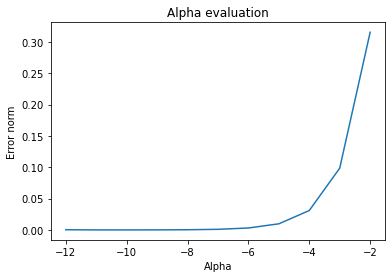

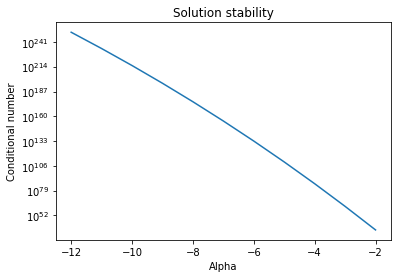

In [97]:
import matplotlib.pyplot as plt

plt.title("Alpha evaluation")
plt.plot(alpha_range, differences)
plt.xlabel("Alpha")
plt.ylabel("Error norm")
plt.show()

plt.title("Solution stability")
plt.plot(alpha_range, stability)
plt.yscale("log", base=10)
plt.xlabel("Alpha")
plt.ylabel("Conditional number")
plt.show()

Then we test alpha value on other x_0

In [98]:
alpha = 10 ** (-6)

def experiment(matr, alpha):
    n, m = matr.shape
    x_0 = np.random.rand(m)
    b = matr.dot(x_0)

    varied_matr = matr + np.eye(m) * 10 ** alpha
    sol_lu = lu_solve(varied_matr, b)

    return la.norm(x_0 - sol_lu)

print(experiment(hilbert_matrix, alpha))

2.368718924417382
